In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

**1. Perform the following statistical analysis on the fifa world cup dataset given. The dataset includes player information which includes height, weight overall rating, potential etc.** 

a)	Assuming age as population, perform central limit theorem with sample size of 200. Find the stand error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)	Is there any evidence the players overall rating is greater than 80?

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.


d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)	Does skill move and week foot has any effect in overall rating. Perform the graphical analysis and the statistical analysis.

Note:

1) Perform all the Statistical analysis with 5%(Significance level). 

2) Perform the test of normality and test of variance in the appropriate places.


In [2]:
fifa=pd.read_csv('fifa_stats.csv')
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


### Description About the Dataset

In [3]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [4]:
fifa.describe(include='all')

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
count,2000,2000.000000,2000,2000.000000,2000.000000,1981,2000,2000.000000,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000
unique,1970,NaN,95,NaN,NaN,285,2,NaN,NaN,NaN,8,27,NaN,NaN,NaN
top,Danilo,NaN,Spain,NaN,NaN,Chelsea,Right,NaN,NaN,NaN,Medium/ Medium,GK,NaN,NaN,NaN
freq,3,NaN,251,NaN,NaN,24,1534,NaN,NaN,NaN,733,194,NaN,NaN,NaN
mean,NaN,27.231500,NaN,78.197000,80.303500,NaN,NaN,1.774500,3.204000,2.919500,NaN,NaN,15.205500,5.781042,169.478000
std,NaN,3.859061,NaN,3.285969,4.114104,NaN,NaN,0.811775,0.728457,0.964098,NaN,NaN,13.210508,0.443337,16.050306
min,NaN,17.000000,NaN,75.000000,75.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,1.000000,5.083333,123.000000
25%,NaN,24.000000,NaN,76.000000,77.000000,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,7.000000,5.500000,159.000000
50%,NaN,27.000000,NaN,77.000000,80.000000,NaN,NaN,2.000000,3.000000,3.000000,NaN,NaN,12.000000,6.000000,170.000000
75%,NaN,30.000000,NaN,80.000000,83.000000,NaN,NaN,2.000000,4.000000,4.000000,NaN,NaN,20.000000,6.166667,181.000000


### Handling Null Values

In [5]:
# null values
fifa.isna().sum() 

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [6]:
# 19 Records of Club are null values.

In [7]:
# Distribution of Club
fifa['Club'].value_counts() 

Chelsea                24
Borussia Dortmund      23
Liverpool              23
Manchester United      23
Napoli                 23
                       ..
Melbourne City FC       1
Vitesse                 1
Urawa Red Diamonds      1
Sparta Praha            1
Minnesota United FC     1
Name: Club, Length: 285, dtype: int64

In [8]:
 # Replacing with mode values
fifa['Club'].fillna('Chelsea',inplace=True)

In [9]:
# checking null values after imputing/
fifa.isna().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

**a) Assuming age as population, perform central limit theorem with sample size of 200. Find the stand error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size**





### Analysis of Population Data:

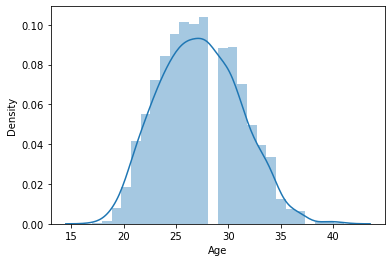

In [10]:
sns.distplot(fifa['Age'])
plt.show()

In [11]:
# Test of Normality

# Ho: Data is not normal
# Ha : Data is normal

print('Test Statistic:',stats.shapiro(fifa['Age'])[0])
print('p_value:',stats.shapiro(fifa['Age'])[1])

Test Statistic: 0.9883174300193787
p_value: 1.1409696104580647e-11


In [12]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Data is not normal.

### Performing Central Limit Theroem:

**Statement:** The study of probability theory, the central limit theorem (CLT) states that the distribution of sample approximates a normal distribution (also known as a “bell curve”) as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population distribution shape.

In [13]:
pop = fifa['Age']

In [14]:
sample_mean=[]
sample_size=200
for i in range(50):
    sample=[]
    for i in range(sample_size):
        sample.append(random.choice(pop))
    sample_mean.append(np.mean(sample))

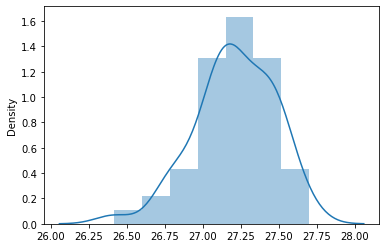

In [15]:
sns.distplot(sample_mean)
plt.show()

In [16]:
# Test of Normality 

# Ho: Data is not normal
# Ha : Data is normal

print('Test Statistic:',stats.shapiro(sample_mean)[0])
print('p_value:',stats.shapiro(sample_mean)[1])

Test Statistic: 0.9718244075775146
p_value: 0.2741605043411255


In [17]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is selected i.e Alternate Hypothesis 
# is not selected. 

# Inference: Data is normal.

### Standard Error 

In [18]:
print('Standard error(Standard Deviation of Sampling Distribution) :',np.std(sample_mean))

Standard error(Standard Deviation of Sampling Distribution) : 0.25825725546439177


### Interpreting the Sampling distribution and Population statistics

As per CLT, 

**Standard error(Standard deviation of Sampling distrbution) ≈ Population Standard Deviation/sqrt(sample size)**

**Sampling Distribution mean ≈ Population Mean**



                                                             

In [19]:

print('Stand error of Sampling distribution:',np.std(sample_mean))
print('Population standarad deviation:',np.std(pop))

Stand error of Sampling distribution: 0.25825725546439177
Population standarad deviation: 3.8580963894127795


In [20]:
print('Stand error of Sampling distribution:',np.std(sample_mean))
print('Population standarad deviation/sqrt(sample size):',np.std(pop)/np.sqrt(sample_size))

Stand error of Sampling distribution: 0.25825725546439177
Population standarad deviation/sqrt(sample size): 0.2728086119425111


In [21]:
print('Mean of Sampling distribution:',np.mean(sample_mean))
print('Mean of Population:',np.mean(pop))

Mean of Sampling distribution: 27.2087
Mean of Population: 27.2315


In [22]:
# Standard error is inversely proportional to sample size. Standard error tends to decrease when 
# there is a increase in the sample size.

# Also, if n increases the sample tends to population. So the mean values of samples will be closer
# to population mean which tends to a decrease in standard deviation of sampling distribution.

**b)	Is there any evidence that the players overall rating is greater than 80?**

In [23]:
# Test of Normality 

# Ho: Data is not normal
# Ha : Data is normal
print('Test Statistic:',stats.shapiro(fifa['Overall_rating'])[0])
print('p_value:',stats.shapiro(fifa['Overall_rating'])[1])

Test Statistic: 0.8525537848472595
p_value: 1.0221183102662362e-39


In [24]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Data is not normal.

In [25]:
# Since data points does not statisfy normality. Wilcoxin one sample test is used to check whether
# overall rating is greater than 80.

In [26]:
# Wilcoxin one sample test

# Ho: μ <= 80
# Ha : μ >  80

mu =80

data = fifa['Overall_rating']-mu
test = stats.wilcoxon(data,alternative='greater')
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 340568.5
p_value: 1.0


In [27]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e Alternate Hypothesis 
# is not selected. 

# Inference: Overall rating is less than 80.

**c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.**




In [28]:
fifa['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [29]:
fifa_left=fifa[fifa['Preferred Foot']=='Left']
fifa_right=fifa[fifa['Preferred Foot']=='Right']

In [30]:
# Test of Normality 

# Ho: Data is not normal
# Ha : Data is normal

data = fifa['Potential']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.9384800791740417
p_value: 5.016414837142018e-28


In [31]:
data = fifa_left['Potential']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.9422042369842529
p_value: 1.7173475098594682e-12


In [32]:
data = fifa_right['Potential']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.9369121193885803
p_value: 5.342442151473519e-25


In [33]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Data is not normal.

In [34]:
# Since data points does not statisfy normality. Mannwhtineyu is the equivalent test for unpaired
# t test.

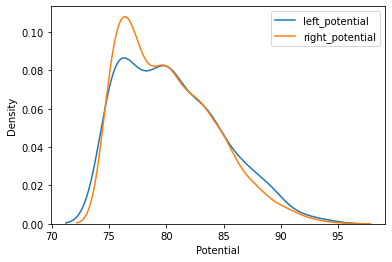

In [35]:
# Graphical understanding:

sns.kdeplot(fifa_left['Potential'],label='left_potential')
sns.kdeplot(fifa_right['Potential'],label='right_potential')
plt.legend()
plt.show()

Inference : No differernce in the mean

In [36]:
# Ho: μ_right =  μ_left (No difference in potential with respect to preffered foot)
# Ha : μ_right ≠  μ_left  (Significant difference in potential with respect to preffered foot)


test = stats.mannwhitneyu(fifa_right['Potential'],fifa_left['Potential'])
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 344181.0
p_value: 0.111812406208667


In [37]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e Alternate Hypothesis 
# is not selected. 

# Inference: No difference is potential with respect to preffered foot.

**d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].**

In [38]:
# Test of Normality 

# Ho: Data is not normal
# Ha : Data is normal

data = fifa['Overall_rating']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.8525537848472595
p_value: 1.0221183102662362e-39


In [39]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Data is not normal.

In [40]:
# Test of Normality 
# Ho: Data is not normal
# Ha : Data is normal

data = fifa['Potential']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.9384800791740417
p_value: 5.016414837142018e-28


In [41]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Data is not normal.

In [42]:
# Since the both the columns are not normal. To check the correlation, spearmanr statistical
# test needs to be used.

In [43]:
# Ho: r = 0 (No correlation between Overall rating and Potential)
# Ha : r ≠ 0  (There exsist correlation between Overall rating and Potential)


test = stats.spearmanr(fifa['Overall_rating'],fifa['Potential'])
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.6904482380449665
p_value: 2.6831262205531135e-283


In [44]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Correlation between Overall rating and Potential.

**e) Does "skill move" and "week foot" has any effect in overall rating. Perform the graphical analysis and the statistical analysis.**

In [45]:
fifa['Skill Moves'].value_counts()

3    828
4    544
2    395
1    194
5     39
Name: Skill Moves, dtype: int64

In [46]:
skm_1=fifa[fifa['Skill Moves']==1]['Overall_rating']
skm_2=fifa[fifa['Skill Moves']==2]['Overall_rating']
skm_3=fifa[fifa['Skill Moves']==3]['Overall_rating']
skm_4=fifa[fifa['Skill Moves']==4]['Overall_rating']
skm_5=fifa[fifa['Skill Moves']==5]['Overall_rating']

In [47]:
# Test of Normality 

# Ho: Data is not normal
# Ha : Data is normal

data = fifa['Overall_rating']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.8525537848472595
p_value: 1.0221183102662362e-39


In [48]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Data is not normal.

In [49]:
# Since data is not normal. kruskal test needs to be performed.

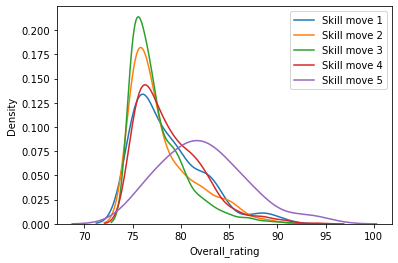

In [50]:
# Graphical Understanding:

sns.kdeplot(skm_1,label='Skill move 1')
sns.kdeplot(skm_2,label='Skill move 2')
sns.kdeplot(skm_3,label='Skill move 3')
sns.kdeplot(skm_4,label='Skill move 4')
sns.kdeplot(skm_5,label='Skill move 5')
plt.legend()
plt.show()

In [51]:
# Inference: Skill move 5 is significantly different from other skill moves.

In [52]:
# Ho: All the skill moves ratings are equal 
#     (No difference in overall rating with respect to skillmove)


# Ha: Atleast one of the skill moves ratings is different 
#     (Difference in overall rating with respect to skillmove)



test = stats.kruskal(skm_1,skm_2,skm_3,skm_4,skm_4)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 93.97620603568315
p_value: 1.8813072396371804e-19


In [53]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Difference is overall rating with respect to skillmoves.

# Further post_hoc analysis is required to find which skillmove is different.

**2. Perform of the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed.** 

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

b) Perform the statistical analysis to check whether the networks are equally distributed in the dataset.

c) Plot the distribution of duration with respect each network in the same graph and Interpret the results from the graph.

d)	Perform the statistical test to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.

e)	Perform the statistical test to identify the relation between network and network_type. 

Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.


In [54]:
phone=pd.read_csv('phone.csv')
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


### Description About the Dataset

In [55]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [56]:
phone.describe(include='all')

,date,duration,item,month,network,network_type
count,820,820.000000,820,820,820,820
unique,738,NaN,3,5,7,4
top,16-01-15 18:07,NaN,call,2014-11,Vodafone,mobile
freq,6,NaN,388,229,215,601
mean,NaN,144.304936,NaN,NaN,NaN,NaN
std,NaN,45.687777,NaN,NaN,NaN,NaN
min,NaN,0.993514,NaN,NaN,NaN,NaN
25%,NaN,112.916486,NaN,NaN,NaN,NaN
50%,NaN,144.179434,NaN,NaN,NaN,NaN
75%,NaN,175.932308,NaN,NaN,NaN,NaN


### Handling Null Values

In [57]:
# null values
phone.isna().sum() 

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

**a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.**

In [58]:
# Test of Normality 

# Ho: Data is not normal
# Ha : Data is normal

data = phone['duration']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.9984679818153381
p_value: 0.701244592666626


In [59]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e 
#Alternate Hypothesis is not elected. 

# Inference: Data is normal.

In [60]:
# Confidence interval can be performed.

In [61]:
data=phone['duration']
mu = np.mean(data)
sigma = np.std(data,ddof=1)/np.sqrt(len(data))
print('For 95% Confidence Interval:',stats.norm.interval(0.95, loc=mu, scale=sigma))

For 95% Confidence Interval: (141.1778397288302, 147.4320313908407)


In [62]:
data=phone['duration']
mu = np.mean(data)
sigma = np.std(data,ddof=1)/np.sqrt(len(data))
print('For 99% Confidence Interval:',stats.norm.interval(0.99, loc=mu, scale=sigma))

For 99% Confidence Interval: (140.19523500408818, 148.41463611558274)


In [63]:
# Inference:
#         Increase in level of confidence,range of the interval increases.
# Intutively,when the range is high, there is a high chance that population mean lies in betweeen the
# interval.

**b) Perform the statistical analysis to check whether the networks are equally distributed in the dataset.**

In [64]:
count = pd.DataFrame(phone['network'].value_counts())

count['network_exp']=phone['network'].value_counts().mean()
count

,network,network_exp
Vodafone,215,117.142857
Three,215,117.142857
data,150,117.142857
Meteor,87,117.142857
Tesco,84,117.142857
landline,42,117.142857
voicemail,27,117.142857


In [65]:
# Ho: Observed = Expected  (Networks are equally distributed)
# Ha : Observed  ≠ Expected  (Networks are not equally distributed)


test = stats.chisquare(f_obs=count['network'],f_exp=count['network_exp'])
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 307.409756097561
p_value: 2.112592760257685e-63


In [66]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Networks are not equally distributed

**c) Plot the distribution of duration with respect each network in the same graph and Interpret the results from the graph.**

In [67]:
phone['network'].value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [68]:
dur_vod = phone[phone['network']=='Vodafone']['duration']
dur_three = phone[phone['network']=='Three']['duration']
dur_data = phone[phone['network']=='data']['duration']
dur_met = phone[phone['network']=='Meteor']['duration']
dur_tes = phone[phone['network']=='Tesco']['duration']
dur_land = phone[phone['network']=='landline']['duration']
dur_voice = phone[phone['network']=='voicemail']['duration']

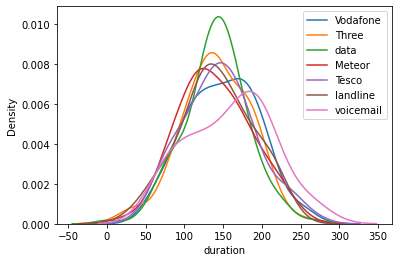

In [69]:
# Graphical Understanding:

sns.kdeplot(dur_vod,label='Vodafone')
sns.kdeplot(dur_three,label='Three')
sns.kdeplot(dur_data,label='data')
sns.kdeplot(dur_met,label='Meteor')
sns.kdeplot(dur_tes,label='Tesco')
sns.kdeplot(dur_land,label='landline')
sns.kdeplot(dur_voice,label='voicemail')
plt.legend()
plt.show()

In [70]:
# Inference :

# There is no significant difference in mean duration of different networks.
# Further Statistical test is required to conclude the results.

**d) Perform the statistical test to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.**


In [71]:
phone['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [72]:
call = phone[phone['item']=='call']['duration']
sms = phone[phone['item']=='sms']['duration']
data = phone[phone['item']=='data']['duration']

In [73]:
# Test of Normality 

# Ho: Data is not normal
# Ha : Data is normal

data = phone['duration']
test = stats.shapiro(data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.9984679818153381
p_value: 0.701244592666626


In [74]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e 
#Alternate Hypothesis is not elected. 

# Inference: Data is normal.

In [75]:
# Test of Variance 

# Ho: All the variance are equal.
# Ha : Atleast one variance is equal.


test = stats.levene(call,sms,data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 0.4047619026837147
p_value: 0.6672091150884149


In [76]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e 
#Alternate Hypothesis is not selected. 

# Inference: All Variance are equal

In [77]:
# Since data is normal and has equal variance, One way Anova can be performed.

In [78]:
# Ho: All the durations are equal 
#     (No difference in duration with respect to item)


# Ha: Atleast one of the durations is different
#     (Significant difference in duration with respect to item)


test = stats.f_oneway(call,sms,data)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 1.462525237103339
p_value: 0.23198358424446627


In [79]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e 
#Alternate Hypothesis is not selected. 

# Inference: No difference in duration with respect to item

**e) Perform the statistical test to identify the relation between network and network_type.** 

In [80]:
pd.crosstab(phone['network'],phone['network_type'])

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [81]:
# Ho: Observed = Expected  (Network and Network_type are not related)
# Ha : Observed  ≠ Expected  (Network and Network_type are related)


test = stats.chi2_contingency(pd.crosstab(phone['network'],phone['network_type']),correction=True)
print('Test Statistic:',test[0])
print('p_value:',test[1])

Test Statistic: 2460.0
p_value: 0.0


In [82]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Network and Network_type are related